<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Multiple-Linear-Regression" data-toc-modified-id="Multiple-Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Multiple Linear Regression</a></span></li><li><span><a href="#Remove-influential-outliers-and-refit-model" data-toc-modified-id="Remove-influential-outliers-and-refit-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Remove influential outliers and refit model</a></span></li><li><span><a href="#Refit-model-with-influential-outliers-removed" data-toc-modified-id="Refit-model-with-influential-outliers-removed-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Refit model with influential outliers removed</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#Feature-Selection-and-Refitting-MLR-with-influential-outliers-removed" data-toc-modified-id="Feature-Selection-and-Refitting-MLR-with-influential-outliers-removed-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Selection and Refitting MLR with influential outliers removed</a></span></li><li><span><a href="#Tree-Based-Models" data-toc-modified-id="Tree-Based-Models-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Tree Based Models</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#XG-Boost" data-toc-modified-id="XG-Boost-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>XG Boost</a></span></li><li><span><a href="#Comparing-Models" data-toc-modified-id="Comparing-Models-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Comparing Models</a></span></li><li><span><a href="#Partial-dependence-plot-for-Age" data-toc-modified-id="Partial-dependence-plot-for-Age-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Partial dependence plot for Age</a></span></li><li><span><a href="#Partial-dependence-plot-for-AgeRemodAdd" data-toc-modified-id="Partial-dependence-plot-for-AgeRemodAdd-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Partial dependence plot for AgeRemodAdd</a></span></li><li><span><a href="#Partial-dependence-plot-for-AgeGarage" data-toc-modified-id="Partial-dependence-plot-for-AgeGarage-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Partial dependence plot for AgeGarage</a></span></li><li><span><a href="#Apply-our-models-to-predict-sale-prices-and-compare-with-acutal-prices" data-toc-modified-id="Apply-our-models-to-predict-sale-prices-and-compare-with-acutal-prices-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Apply our models to predict sale prices and compare with acutal prices</a></span></li><li><span><a href="#Test-models-with-dataset-of-houses-<=60-years" data-toc-modified-id="Test-models-with-dataset-of-houses-<=60-years-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Test models with dataset of houses &lt;=60 years</a></span></li><li><span><a href="#EDA-figures-for-presentation" data-toc-modified-id="EDA-figures-for-presentation-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>EDA figures for presentation</a></span></li></ul></div>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.model_selection as ms
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from statsmodels.graphics.regressionplots import *
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn import neighbors
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [207]:
#import df for linear models
train_dum_df = pd.read_csv('/Users/RK/Google Drive/NYC_DSA/Project3_ML/Housing_Price_Prediction/Marcus_C/Data/train_dum_df.csv', index_col=0)
test_dum_df = pd.read_csv('/Users/RK/Google Drive/NYC_DSA/Project3_ML/Housing_Price_Prediction/Marcus_C/Data/test_dum_df.csv', index_col=0)

In [208]:
#assign predictor and target variables
y = train_dum_df['SalePrice'].apply(np.log)
X = train_dum_df.drop(["SalePrice"], axis = 1)

In [209]:
#train/test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [210]:
#comparison dataframes for graphing
#r2_scores = pd.DataFrame(columns=('Model', 'Score'))
rmse_scores = pd.DataFrame(columns=('Model','Score', 'Error_USD'))

In [211]:
# function to convert RMSE to Error in USD

def error_conv(Xtest, ytest, model):
    '''function to convert RMSE to Error in USD
    Xtest= X dataframe
    ytest= output series
    model= prediction model name
    '''
    return np.sqrt(np.mean((np.exp(ytest)-np.exp(model.predict(Xtest)))**2))

## Multiple Linear Regression

In [212]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_train_predicted = lr.predict(X_train)
train_RMSE = np.sqrt(mean_squared_error(y_train, y_train_predicted))
train_MAE = mean_absolute_error(y_train, y_train_predicted)

y_test_predicted = lr.predict(X_test)
test_RMSE = np.sqrt(mean_squared_error(y_test,y_test_predicted))
test_MAE = mean_absolute_error(y_test,y_test_predicted)


print("R^2 train set: %f" %lr.score(X_train, y_train))
print("R^2 test set: %f" %lr.score(X_test, y_test))
print('-'*50)
print('RMSE for train data is: %.3f' % train_RMSE)
print('RMSE for test data is: %.3f' % test_RMSE)
print('-'*50)
print('MAE for train data is: %.3f' % train_MAE)
print('MAE for test data is: %.3f' % test_MAE)

R^2 train set: 0.910181
R^2 test set: 0.882335
--------------------------------------------------
RMSE for train data is: 0.118
RMSE for test data is: 0.141
--------------------------------------------------
MAE for train data is: 0.082
MAE for test data is: 0.102


In [213]:
#scores for graphing
#r2_scores.loc[0] = 'Multiple Linear Regression', round(lr2.score(X_test, y_test), 2)
rmse_scores.loc[0] = 'Multiple Linear Regression', round(test_RMSE, 4), int(error_conv(X_test, y_test, lr))

In [214]:
rmse_scores.loc[0]

Model        Multiple Linear Regression
Score                            0.1413
Error_USD                         27775
Name: 0, dtype: object

In [200]:
# manually checking RMSE
np.sqrt(np.mean(((y_test)-(lr.predict(X_test)))**2))

0.1412847653964417

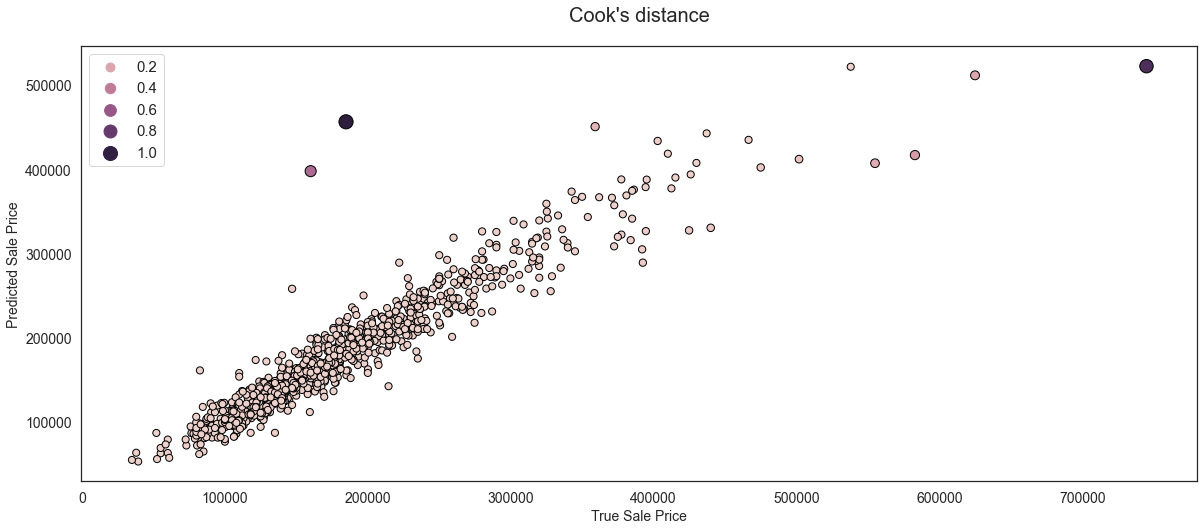

In [127]:
pred1 = lr.predict(X_train)
model = smf.ols('np.exp(y_train) ~ np.exp(pred1)', data=X_train).fit()

# calculate the cooks_distance - the OLSInfluence object contains multiple influence measurements
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance

# scatter plot - x axis (independent variable height), y-axis (dependent variable weight), size and color of the marks according to its cook's distance
sns.scatterplot(x = np.exp(y_train), y = np.exp(pred1), hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('True Sale Price', fontsize=14)
plt.ylabel('Predicted Sale Price', fontsize=14)
plt.title('Cook\'s distance', fontsize=20);

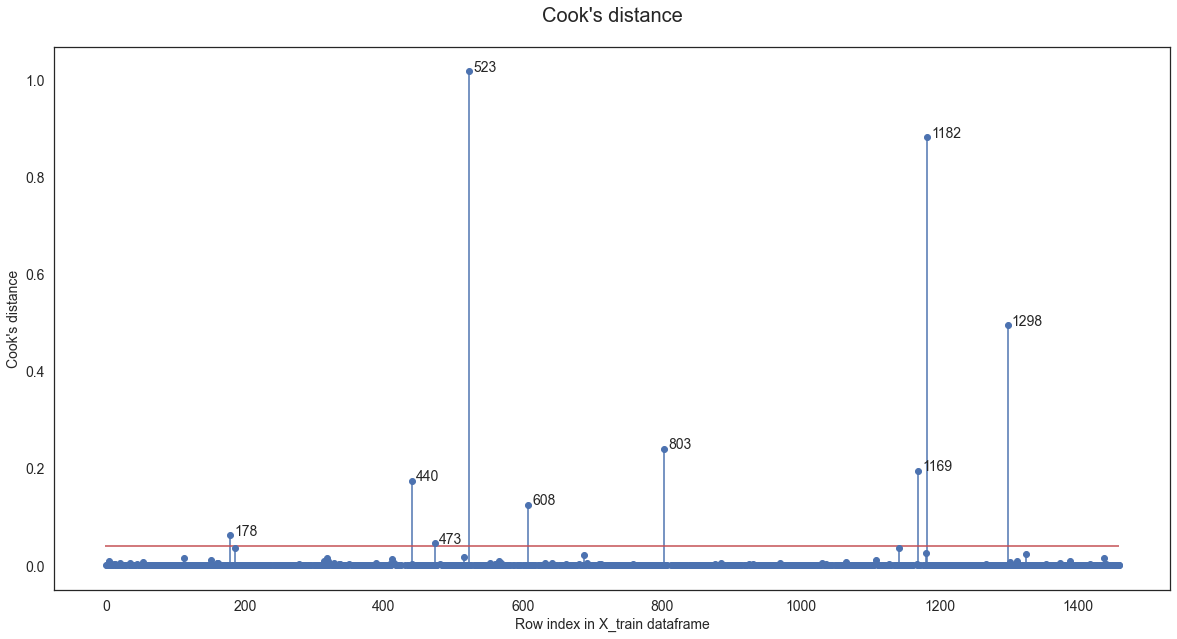

In [128]:
threshold = 4/100 # can change this
plt.figure(figsize=(20,10))
# stem plot - the x-axis represents the index of the observation and the y-axis its Cook's distance
plt.stem(distance.index, distance.values, basefmt=" ")

# horizontal line showing the threshold value
plt.hlines(threshold, -2, 1459, 'r')

# the observations with Cook's distances higher than the threshold value are labeled in the plot
influencial_data = distance[distance > threshold]

for index, value in influencial_data.items():
    plt.text(index + 6, value, str(index), fontsize=14)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Row index in X_train dataframe', fontsize=14)
plt.ylabel('Cook\'s distance', fontsize=14)
plt.title('Cook\'s distance', fontsize=20);

In [10]:
# identify rows in X_train df that are influential outliers
X_train.loc[influencial_data.index,:]

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotFrontage,LotArea,OverallQual,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageFinish,GarageCars,GarageQual,Total_OutdoorSF,Baths,Age,AgeRemodAdd,AgeGarage
1182,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,160.0,15623,10,0.0,4,5,2396,5,1,4476,5,10,3,3,3,3,249,5,11,11,11.0
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63.0,17423,9,748.0,5,5,2216,5,1,2234,5,9,4,3,3,3,60,3,1,0,0.0
523,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0

## Remove influential outliers and refit model

In [129]:
X_train_drop = X_train.drop(influencial_data.index, axis=0)
y_train_drop = y_train.drop(influencial_data.index, axis=0)

## Refit model with influential outliers removed

In [12]:
# using original threshold for influential outliers : 4/100, 
# gives the best values for the metrics
lr = LinearRegression()
lr.fit(X_train_drop, y_train_drop)

y_train_predicted = lr.predict(X_train_drop)
RMSE_train = np.sqrt(mean_squared_error(y_train_drop, y_train_predicted))
MAE_train = mean_absolute_error(y_train_drop, y_train_predicted)

y_test_predicted = lr.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test,y_test_predicted))
MAE_test = mean_absolute_error(y_test,y_test_predicted)

#print("Best Lambda: " + str(alpha_lasso3))
print("R^2 train set: %f" %lr.score(X_train_drop, y_train_drop))
print("R^2 test set: %f" %lr.score(X_test, y_test))
print('-'*50)
print('RMSE for train data is: %.3f' % RMSE_train)
print('RMSE for test data is: %.3f' % RMSE_test)
print('-'*50)
print('MAE for train data is: %.3f' % MAE_train)
print('MAE for test data is: %.3f' % MAE_test)

R^2 train set: 0.930447
R^2 test set: 0.889927
--------------------------------------------------
RMSE for train data is: 0.101
RMSE for test data is: 0.137
--------------------------------------------------
MAE for train data is: 0.072
MAE for test data is: 0.097


## Lasso 

In [130]:
lasso = Lasso(normalize = True, max_iter = 10000)


alpha_100 = np.logspace(-7,-1, 100)
coef = []
for i in alpha_100:
    lasso.set_params(alpha = i)
    lasso.fit(X, y)
    coef.append(lasso.coef_)

Text(0, 0.5, 'coefficients')

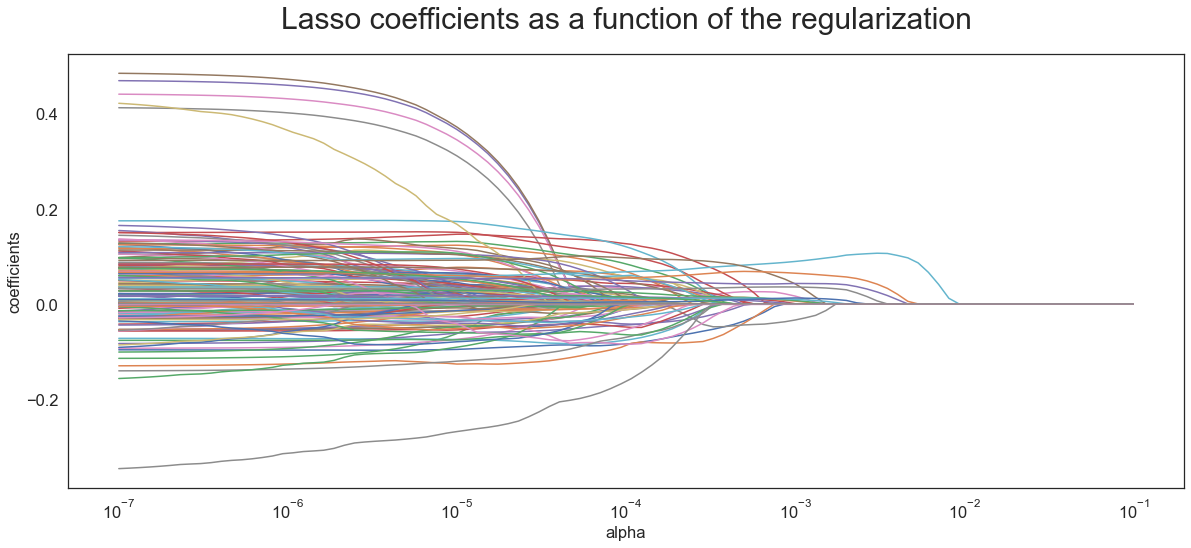

In [131]:
df_coef = pd.DataFrame(coef, index=alpha_100)
title = 'Lasso coefficients as a function of the regularization'
axes = df_coef.plot(logx = True, title=title, legend = False)
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')

In [132]:
lassocv = LassoCV(alphas = alpha_100, normalize = True, cv = 10, max_iter = 10000)

In [133]:
lassocv.fit(X_train, y_train)
alpha_lasso = lassocv.alpha_

y_train_predicted1 = lassocv.predict(X_train)
RMSE_train1 = np.sqrt(mean_squared_error(y_train,y_train_predicted1))

y_test_predicted1 = lassocv.predict(X_test)
RMSE_test1 = np.sqrt(mean_squared_error(y_test,y_test_predicted1))

print("Best Lambda: " + str(alpha_lasso))
print("R^2 train set: %f" %lassocv.score(X_train, y_train))
print("R^2 test set: %f" %lassocv.score(X_test, y_test))
print('RMSE for train data is: %.3f' % RMSE_train1)
print('RMSE for test data is: %.3f' % RMSE_test1)

Best Lambda: 0.00014174741629268049
R^2 train set: 0.892270
R^2 test set: 0.881130
RMSE for train data is: 0.129
RMSE for test data is: 0.142


In [134]:
lassocv_coef = pd.DataFrame(lassocv.coef_, index = X.columns).rename(columns = {0:"Coef."})
lassocv_imp = lassocv_coef[lassocv_coef["Coef."] > 0]
lassocv_imp = lassocv_coef.reindex(lassocv_coef["Coef."].abs().sort_values(ascending = False).index)
lassocv_imp.head(10)

,Coef.
Exterior1st_BrkComm,-0.187989
Neighborhood_StoneBr,0.125988
Neighborhood_Crawfor,0.117401
MSSubClass_30,-0.106239
CentralAir,0.098440
Neighborhood_NridgHt,0.092029
GarageCond_Po,0.088922
Neighborhood_NoRidge,0.085297
Exterior1st_BrkFace,0.084642
LotShape_IR3,-0.080876


## Feature Selection and Refitting MLR with influential outliers removed

In [135]:
imp_cols = lassocv_coef[lassocv_coef["Coef."] != 0].index.tolist()
print("Shape of Data set with only important features: " + str(X[imp_cols].shape))

Shape of Data set with only important features: (1460, 66)


In [136]:
#LASSO then Regression
y_train_drop_predicted = lassocv.predict(X_train_drop)

lr2 = LinearRegression()

lr2.fit(X_train_drop[imp_cols], y_train_drop)

y_train_predicted2 = lr2.predict(X_train_drop[imp_cols])
RMSE_train2 = np.sqrt(mean_squared_error(y_train_drop, y_train_predicted2))
MAE_train2 = mean_absolute_error(y_train_drop, y_train_predicted2)


y_test_predicted2 = lr2.predict(X_test[imp_cols])
RMSE_test2 = np.sqrt(mean_squared_error(y_test,y_test_predicted2))
MAE_test2 = mean_absolute_error(y_test,y_test_predicted2)


#print("Best Lambda: " + str(alpha_lasso3))
print("R^2 train set: %f" %lr2.score(X_train_drop[imp_cols], y_train_drop))
print("R^2 test set: %f" %lr2.score(X_test[imp_cols], y_test))
print('-'*50)
print('RMSE for train data is: %.3f' % RMSE_train2)
print('RMSE for test data is: %.3f' % RMSE_test2)
print('-'*50)
print('MAE for train data is: %.3f' % MAE_train2)
print('MAE for test data is: %.3f' % MAE_test2)

R^2 train set: 0.919379
R^2 test set: 0.888399
--------------------------------------------------
RMSE for train data is: 0.109
RMSE for test data is: 0.138
--------------------------------------------------
MAE for train data is: 0.079
MAE for test data is: 0.094


In [215]:
#scores for graphing
#r2_scores.loc[1] = 'Lasso', round(lasso2.score(X_test, y_test), 2)
#rmse_scores.loc[1] = 'Lasso', round(RMSE_test2, 4)
rmse_scores.loc[1] = 'Lasso', round(RMSE_test2, 4), int(error_conv(X_test[imp_cols], y_test, lr2))

In [21]:
### LASSO 
lasso2 = Lasso()
lasso2.fit(X_train_drop[imp_cols], y_train_drop)

y_train_predicted3 = lasso2.predict(X_train_drop[imp_cols])
RMSE_train3 = np.sqrt(mean_squared_error(y_train_drop, y_train_predicted3))
MAE_train3 = mean_absolute_error(y_train_drop, y_train_predicted3)


y_test_predicted3 = lasso2.predict(X_test[imp_cols])
RMSE_test3 = np.sqrt(mean_squared_error(y_test,y_test_predicted3))
MAE_test3 = mean_absolute_error(y_test,y_test_predicted3)


#print("Best Lambda: " + str(alpha_lasso3))
print("R^2 train set: %f" %lasso2.score(X_train_drop[imp_cols], y_train_drop))
print("R^2 test set: %f" %lasso2.score(X_test[imp_cols], y_test))
print('-'*50)
print('RMSE for train data is: %.3f' % RMSE_train3)
print('RMSE for test data is: %.3f' % RMSE_test3)
print('-'*50)
print('MAE for train data is: %.3f' % MAE_train3)
print('MAE for test data is: %.3f' % MAE_test3)

R^2 train set: 0.786538
R^2 test set: 0.813613
--------------------------------------------------
RMSE for train data is: 0.177
RMSE for test data is: 0.178
--------------------------------------------------
MAE for train data is: 0.127
MAE for test data is: 0.127


## Tree Based Models

In [138]:
#import df
train_undum_df = pd.read_csv('/Users/RK/Google Drive/NYC_DSA/Project3_ML/Housing_Price_Prediction/Marcus_C/Data/train_undum_df.csv', index_col=0)
test_undum_df = pd.read_csv('/Users/RK/Google Drive/NYC_DSA/Project3_ML/Housing_Price_Prediction/Marcus_C/Data/test_undum_df.csv', index_col=0)

In [205]:
#assign predictor and target variables
yu = train_undum_df['SalePrice'].apply(np.log)
Xu = train_undum_df.drop(["SalePrice"], axis = 1)

In [206]:
#train/test split 
Xu_train, Xu_test, yu_train, yu_test = train_test_split(Xu, yu, test_size = 0.3, random_state = 0)

## Random Forest

In [141]:
# best parameters with lowered max_depth
rf = RandomForestRegressor(bootstrap= False,
                    ccp_alpha= 0.0,
                    criterion= 'mse',
                    max_depth= 6,
                    max_features= 8,
                    max_leaf_nodes= None,
                    max_samples= None,
                    min_samples_leaf= 1,
                    min_samples_split= 2,
                    n_estimators= 500,
                    random_state= 42)

rf.fit(Xu_train, yu_train)

RandomForestRegressor(bootstrap=False, max_depth=6, max_features=8,
                      n_estimators=500, random_state=42)

In [142]:
train_baseline_rf = rf.predict(Xu_train)
RMSE_train4 = np.sqrt(mean_squared_error(yu_train, train_baseline_rf))
MAE_train4 = mean_absolute_error(yu_train, train_baseline_rf)


test_baseline_rf = rf.predict(Xu_test)
RMSE_test4 = np.sqrt(mean_squared_error(yu_test,test_baseline_rf))
MAE_test4 = mean_absolute_error(yu_test,test_baseline_rf)

print("R^2 for train data is: %.3f" %(rf.score(Xu_train, yu_train)))
print("R^2 for test data is: %.3f" %(rf.score(Xu_test,yu_test)))
print("-" * 50)
print("RMSE for train data is: %.3f" % RMSE_train4)
print("RMSE for test data is: %.3f" % RMSE_test4)
print("-" * 50)
print("MAE for train data is: %.4f" % MAE_train4)
print("MAE for test data is: %.4f" % MAE_test4)

R^2 for train data is: 0.932
R^2 for test data is: 0.886
--------------------------------------------------
RMSE for train data is: 0.105
RMSE for test data is: 0.133
--------------------------------------------------
MAE for train data is: 0.0772
MAE for test data is: 0.0941


In [216]:
#scores for graphing
#r2_scores.loc[2] = 'Random Forest', round(rf.score(X_test, y_test), 2)
#rmse_scores.loc[2] = 'Random Forest', round(RMSE_test4, 4)
rmse_scores.loc[2] = 'Random Forest', round(RMSE_test4, 4), int(error_conv(Xu_test, yu_test, rf))

(9.5, -0.5)

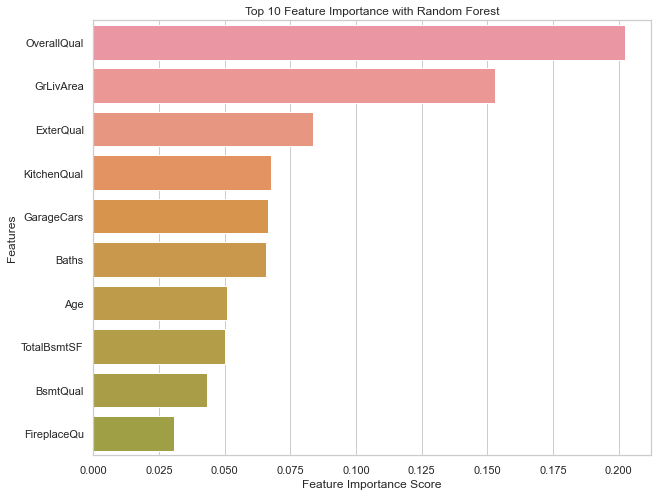

In [28]:
#feature importance graph
sorted_importance = sorted(zip(Xu_train.columns, rf.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (10,8))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
ax = sns.barplot(data = df, x = 'importance_score', y= 'feature_name', orient = 'h');
plt.title('Top 10 Feature Importance with Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.ylim(bottom=(9.5,-0.5))

# plt.savefig("Top10_Features.png")

## Gradient Boosting

In [144]:
#manually lowered max depth 
gbm = GradientBoostingRegressor(n_estimators=1000,
                                 learning_rate=0.01,
                                 max_depth=2,
                                 max_features=15)

gbm.fit(Xu_train, yu_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, max_features=15,
                          n_estimators=1000)

In [145]:
train_baseline_gbm = gbm.predict(Xu_train)
RMSE_train5 = np.sqrt(mean_squared_error(yu_train, train_baseline_gbm))
MAE_train5 = mean_absolute_error(yu_train, train_baseline_gbm)


test_baseline_gbm = gbm.predict(Xu_test)
RMSE_test5 = np.sqrt(mean_squared_error(yu_test,test_baseline_gbm))
MAE_test5 = mean_absolute_error(yu_test,test_baseline_gbm)


print("Final Values: ")
print("R^2 for train data is: %.3f" %(gbm.score(Xu_train, yu_train)))
print("R^2 for test data is: %.3f" %(gbm.score(Xu_test,yu_test)))
print("-" * 50)
print("RMSE for train data is: %.3f" % RMSE_train5)
print("RMSE for test data is: %.3f" % RMSE_test5)
print("-" * 50)
print("MAE for train data is: %.4f" % MAE_train5)
print("MAE for test data is: %.4f" % MAE_test5)

Final Values: 
R^2 for train data is: 0.928
R^2 for test data is: 0.889
--------------------------------------------------
RMSE for train data is: 0.108
RMSE for test data is: 0.131
--------------------------------------------------
MAE for train data is: 0.0792
MAE for test data is: 0.0924


In [217]:
#scores for graphing
#r2_scores.loc[3] = 'Gradient Boost', round(gbm.score(X_test, y_test), 2)
#rmse_scores.loc[3] = 'Gradient Boost', round(RMSE_test5, 4)
rmse_scores.loc[3] = 'Gradient Boost', round(RMSE_test5, 4), int(error_conv(Xu_test, yu_test, gbm))

(9.5, -0.5)

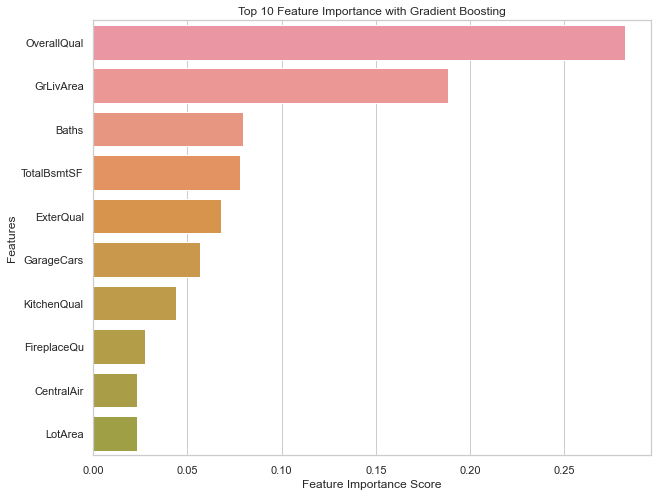

In [32]:
#feature importance graph
sorted_importance = sorted(zip(Xu_train.columns, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (10,8))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
ax = sns.barplot(data = df, x = 'importance_score', y= 'feature_name', orient = 'h');
plt.title('Top 10 Feature Importance with Gradient Boosting')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.ylim(bottom=(9.5,-0.5))

## XG Boost

In [151]:
#manually lowered max depth 
xgb= XGBRegressor(colsample_bytree= 0.8,
                        gamma= 0,
                        learning_rate=0.01,
                        max_depth= 6,
                        min_child_weight= 1,
                        n_estimators= 1000,
                        random_state=1,
                        reg_alpha= 0,
                        subsample= 0.8)
xgb.fit(Xu_train, yu_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [152]:
train_baseline_xgb = xgb.predict(Xu_train)
RMSE_train6 = np.sqrt(mean_squared_error(yu_train, train_baseline_xgb))
MAE_train6 = mean_absolute_error(yu_train, train_baseline_xgb)


test_baseline_xgb = xgb.predict(Xu_test)
RMSE_test6 = np.sqrt(mean_squared_error(yu_test,test_baseline_xgb))
MAE_test6 = mean_absolute_error(yu_test,test_baseline_xgb)


print("Final Values: ")
print("R^2 for train data is: %.3f" %(xgb.score(Xu_train, yu_train)))
print("R^2 for test data is: %.3f" %(xgb.score(Xu_test,yu_test)))
print("-" * 50)
print("RMSE for train data is: %.3f" % RMSE_train6)
print("RMSE for test data is: %.3f" % RMSE_test6)
print("-" * 50)
print("MAE for train data is: %.4f" % MAE_train6)
print("MAE for test data is: %.4f" % MAE_test6)


Final Values: 
R^2 for train data is: 0.985
R^2 for test data is: 0.901
--------------------------------------------------
RMSE for train data is: 0.049
RMSE for test data is: 0.124
--------------------------------------------------
MAE for train data is: 0.0368
MAE for test data is: 0.0881


In [218]:
#scores for graphing
#r2_scores.loc[4] = 'Gradient Boost', round(gbm.score(X_test, y_test), 2)
#rmse_scores.loc[4] = 'XG Boost', round(RMSE_test6, 4)
rmse_scores.loc[4] = 'XG Boost', round(RMSE_test6, 4), int(error_conv(Xu_test, yu_test, xgb))

In [219]:
rmse_scores

,Model,Score,Error_USD
0,Multiple Linear Regression,0.1413,27775
1,Lasso,0.1376,24952
2,Random Forest,0.1329,32361
3,Gradient Boost,0.1309,31291
4,XG Boost,0.1238,29325


(9.5, -0.5)

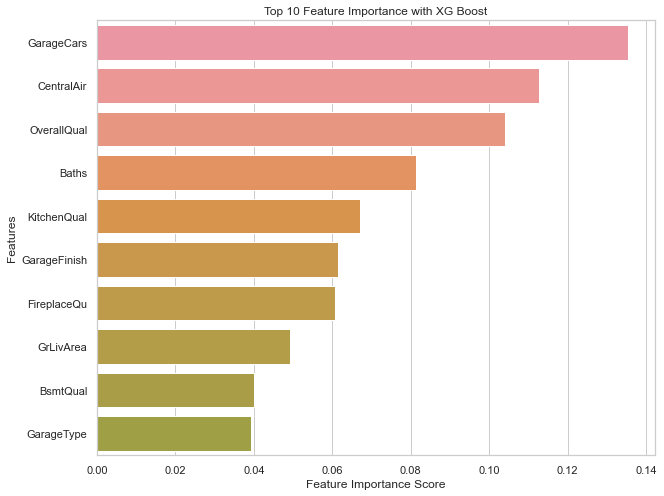

In [36]:
#feature importance graph
sorted_importance = sorted(zip(Xu_train.columns, xgb.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (10,8))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
ax = sns.barplot(data = df, x = 'importance_score', y= 'feature_name', orient = 'h');
plt.title('Top 10 Feature Importance with XG Boost')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.ylim(bottom=(9.5,-0.5))

## Comparing Models

,Model,Score,Error_USD
0,Multiple Linear Regression,0.1413,27775.0
1,Lasso,0.1376,24952.0
2,Random Forest,0.1329,32361.0
3,Gradient Boost,0.1309,31291.0
4,XG Boost,0.1238,29325.0


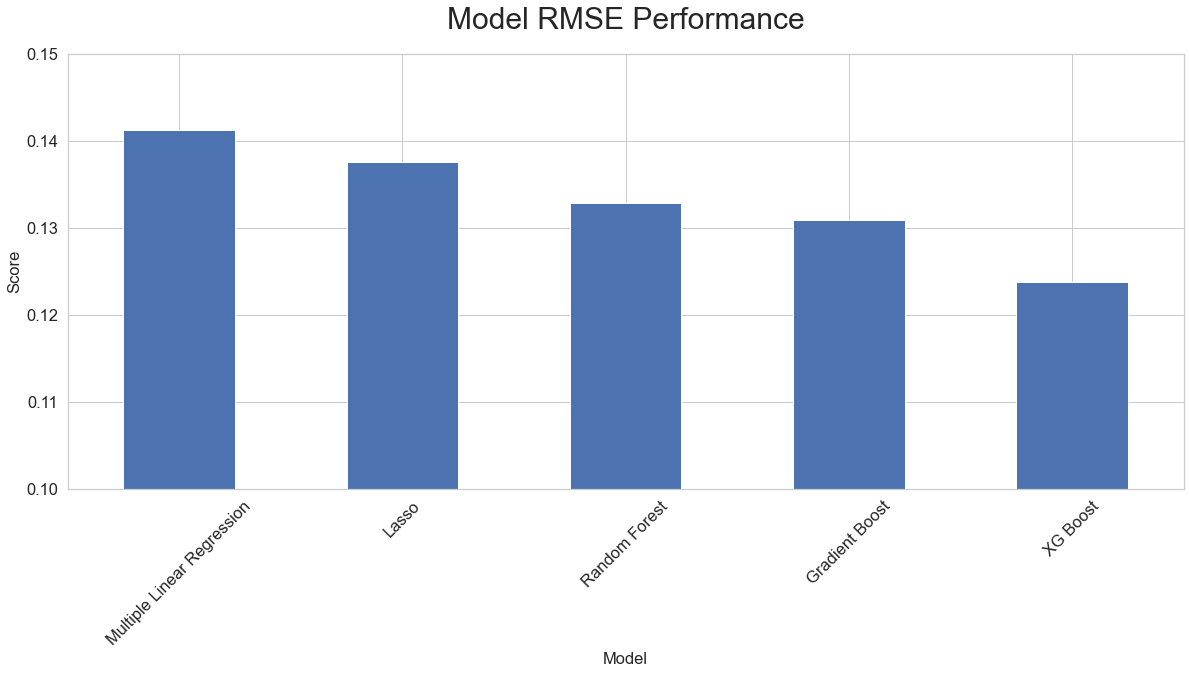

In [202]:

scores = rmse_scores.sort_values(by='Score', ascending=False)
scores.plot.bar(x = 'Model', y ='Score', color = 'b',legend=None)
plt.title('Model RMSE Performance')
plt.ylim(.1,.15)
plt.ylabel('Score')
plt.xticks(rotation=45)

scores

,Model,Score,Error_USD
2,Random Forest,0.1329,32361.0
3,Gradient Boost,0.1309,31291.0
4,XG Boost,0.1238,29325.0
0,Multiple Linear Regression,0.1413,27775.0
1,Lasso,0.1376,24952.0


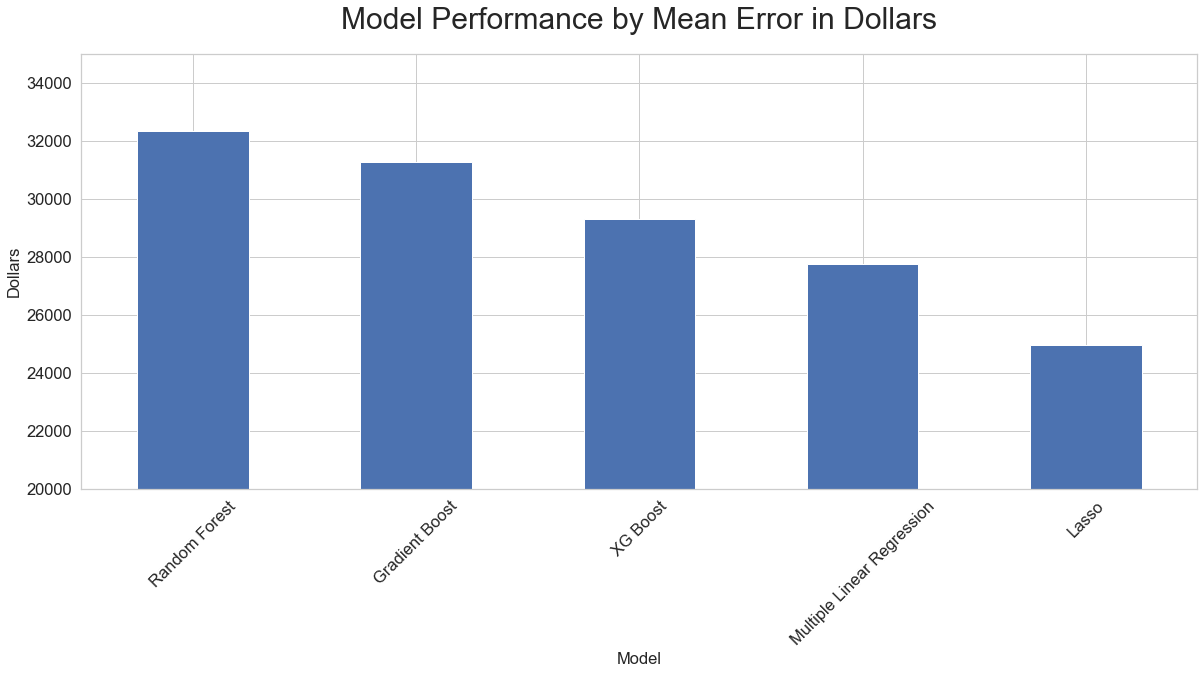

In [197]:
scores = rmse_scores.sort_values(by='Error_USD', ascending=False)
scores.plot.bar(x = 'Model', y ='Error_USD', color = 'b',legend=None)
plt.title('Model Performance by Mean Error in Dollars')
plt.ylim(20000,35000)
plt.ylabel('Dollars')
plt.xticks(rotation=45)

scores

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Multiple-Linear-Regression" data-toc-modified-id="Multiple-Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Multiple Linear Regression</a></span></li><li><span><a href="#Remove-influential-outliers-and-refit-model" data-toc-modified-id="Remove-influential-outliers-and-refit-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Remove influential outliers and refit model</a></span></li><li><span><a href="#Refit-model-with-influential-outliers-removed" data-toc-modified-id="Refit-model-with-influential-outliers-removed-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Refit model with influential outliers removed</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#Feature-Selection-and-Refitting-MLR-with-influential-outliers-removed" data-toc-modified-id="Feature-Selection-and-Refitting-MLR-with-influential-outliers-removed-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Selection and Refitting MLR with influential outliers removed</a></span></li><li><span><a href="#Tree-Based-Models" data-toc-modified-id="Tree-Based-Models-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Tree Based Models</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#XG-Boost" data-toc-modified-id="XG-Boost-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>XG Boost</a></span></li><li><span><a href="#Comparing-Models" data-toc-modified-id="Comparing-Models-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Comparing Models</a></span></li><li><span><a href="#Partial-dependence-plot-for-Age" data-toc-modified-id="Partial-dependence-plot-for-Age-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Partial dependence plot for Age</a></span></li><li><span><a href="#Partial-dependence-plot-for-AgeRemodAdd" data-toc-modified-id="Partial-dependence-plot-for-AgeRemodAdd-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Partial dependence plot for AgeRemodAdd</a></span></li><li><span><a href="#Partial-dependence-plot-for-AgeGarage" data-toc-modified-id="Partial-dependence-plot-for-AgeGarage-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Partial dependence plot for AgeGarage</a></span></li><li><span><a href="#Apply-our-best-performing-machine-learning-model-to-assign-sale-prices" data-toc-modified-id="Apply-our-best-performing-machine-learning-model-to-assign-sale-prices-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Apply our best performing machine learning model to assign sale prices</a></span></li></ul></div>

## Partial dependence plot for Age

In [196]:
size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size*1.1,
          'axes.titlesize': size*2,
          'axes.labelsize': size*1.1,
          'xtick.labelsize': size*1.1,
          'ytick.labelsize': size*1.1,
          'axes.titlepad': 25,
          'figure.titlesize': size*2,
          'legend.fontsize': size,
            'legend.title_fontsize': size*1.1
         }

plt.rcParams.update(params)

sns.set_style("whitegrid")

In [ ]:
pdp_values1 = []
pdp_values2 = []
pdp_values3 = []
pdp_values4 = []
pdp_values5 = []

# for n in X_train['Age']:
#   X_pdp = X_train.copy()
#   X_pdp['Age'] = n
#   pdp_values1.append(np.mean(lr.predict(X_pdp)))
#   pdp_values2.append(np.mean(lr2.predict(X_pdp)))

for n in Xu_train['Age']:
  X_pdp = Xu_train.copy()
  X_pdp['Age'] = n
  pdp_values3.append(np.mean(rf.predict(X_pdp)))
  pdp_values4.append(np.mean(gbm.predict(X_pdp)))
  pdp_values5.append(np.mean(xgb.predict(X_pdp)))

In [68]:
age_df= pd.DataFrame({'Age':Xu_train['Age'], 'Rand_Forest':np.exp(pdp_values3), 
                      'Grad_Boost':np.exp(pdp_values4), 'XGBoost':np.exp(pdp_values5), "Mean_Pred"})
#'MLR':np.exp(pdp_values1), 'Lasso':np.exp(pdp_values2), 

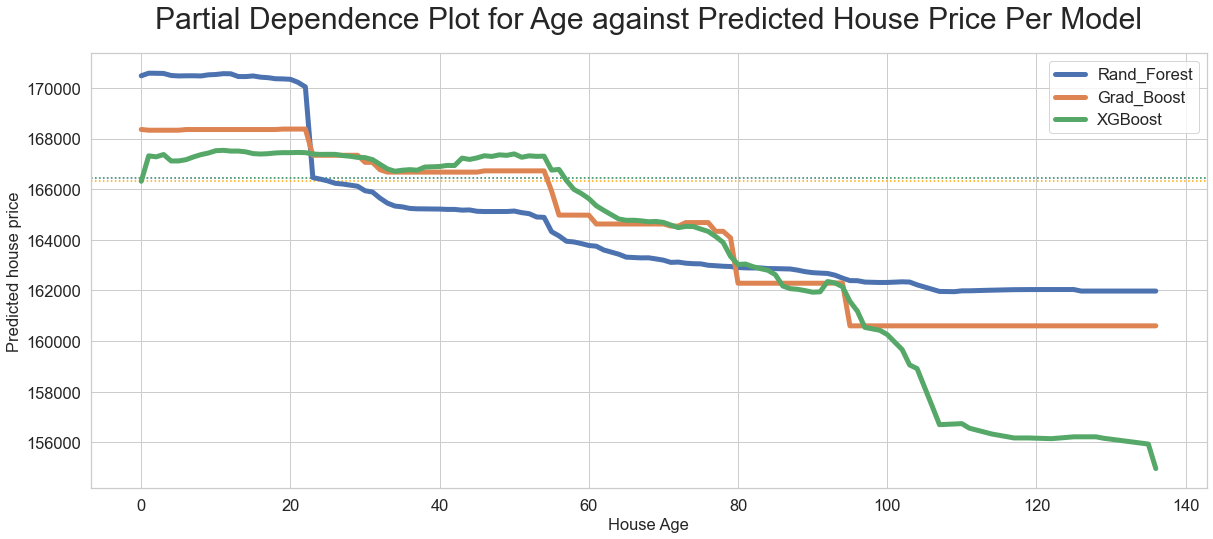

In [316]:
sns.lineplot(x='Age', y='value', data=pd.melt(age_df, ['Age'], var_name='Model'), hue='Model', linewidth=5, zorder=1000)

#sns.lineplot(x='Age', y='avg_preds', data=age_price1, color='gray', linestyle=':',linewidth=2, zorder=-1)
#sns.regplot(x='Age', y='avg_preds', data=age_price1, color='gray',scatter=False, order=10, ci=False)

#sns.scatterplot(x='Age', y='avg_preds', data=age_price1, color='gray', zorder=-1)
# plt.axhline(np.exp(np.mean(lr.predict(Xu_train))), color='gray',linestyle=':')
# plt.axhline(np.exp(np.mean(lr2.predict(Xu_train))), color='black',linestyle=':')
plt.axhline(np.exp(np.mean(rf.predict(Xu_train))), color='b',linestyle=':')
plt.axhline(np.exp(np.mean(gbm.predict(Xu_train))), color='g',linestyle=':')
plt.axhline(np.exp(np.mean(xgb.predict(Xu_train))), color='orange',linestyle=':')

plt.ylabel('Predicted house price')
plt.xlabel('House Age')
plt.title('Partial Dependence Plot for Age against Predicted House Price Per Model')

#plt.ylim(125000,185000)

leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(5)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(size*1.1)
#plt.show()

## Partial dependence plot for AgeRemodAdd

In [66]:
pdp_values1 = []
pdp_values2 = []
pdp_values3 = []
for n in Xu_train['AgeRemodAdd']:
  X_pdp = Xu_train.copy()
  X_pdp['AgeRemodAdd'] = n
  pdp_values1.append(np.mean(rf.predict(X_pdp)))
  pdp_values2.append(np.mean(gbm.predict(X_pdp)))
  pdp_values3.append(np.mean(xgb.predict(X_pdp)))

ageremodadd_df= pd.DataFrame({'AgeRemodAdd':Xu_train['AgeRemodAdd'], 'Rand_Forest':np.exp(pdp_values1), 'Grad_Boost':np.exp(pdp_values2), 'XGBoost':np.exp(pdp_values3)})

KeyboardInterrupt: 

In [65]:
sns.lineplot(x='AgeRemodAdd', y='value', data=pd.melt(ageremodadd_df, ['AgeRemodAdd'], var_name='Model'), hue='Model', linewidth=5, zorder=1000)

plt.axhline(np.exp(np.mean(rf.predict(Xu_train))), color='b',linestyle=':')
plt.axhline(np.exp(np.mean(gbm.predict(Xu_train))), color='g',linestyle=':')
plt.axhline(np.exp(np.mean(xgb.predict(Xu_train))), color='orange',linestyle=':')

plt.ylabel('Predicted house price')
plt.xlabel('Years since Remodel/Addition')
plt.title('Partial dependence plot for Age of Remodel/Addition against Predicted House Price for Models')
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
#plt.show()

NameError: name 'ageremodadd_df' is not defined

## Partial dependence plot for AgeGarage

In [98]:
pdp_values1 = []
pdp_values2 = []
pdp_values3 = []
for n in Xu_train['AgeGarage']:
  X_pdp = Xu_train.copy()
  X_pdp['AgeGarage'] = n
  pdp_values1.append(np.mean(rf.predict(X_pdp)))
  pdp_values2.append(np.mean(gbm.predict(X_pdp)))
  pdp_values3.append(np.mean(xgb.predict(X_pdp)))

agegarage_df= pd.DataFrame({'AgeGarage':Xu_train['AgeGarage'], 'Rand_Forest':np.exp(pdp_values1), 'Grad_Boost':np.exp(pdp_values2), 'XGBoost':np.exp(pdp_values3)})

Text(0.5, 1.0, 'Partial dependence plot for Garage Age against Predicted House Price for Models')

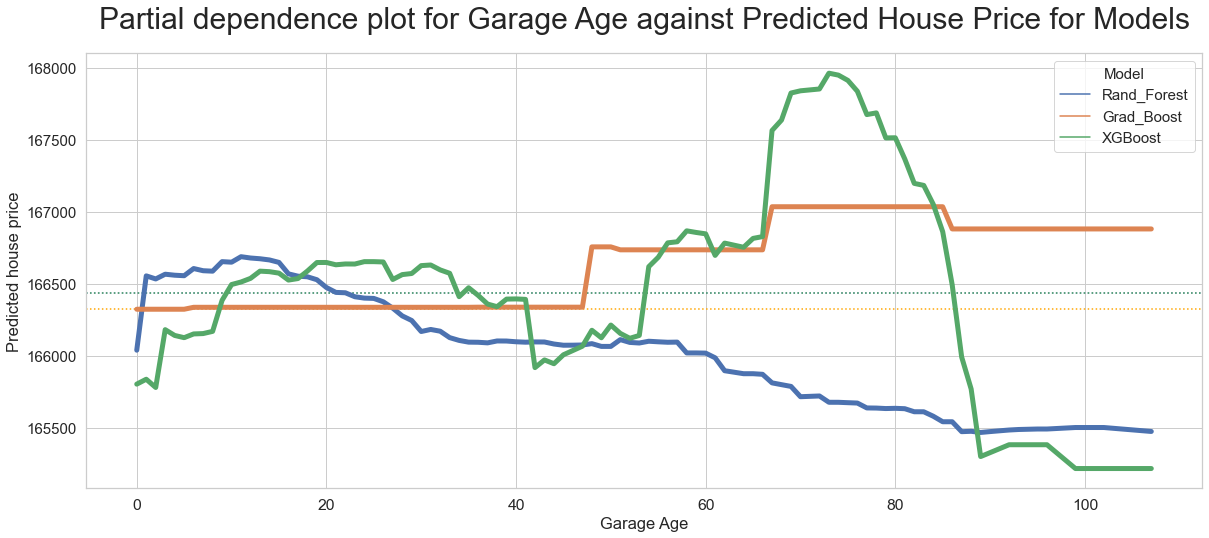

In [99]:
sns.lineplot(x='AgeGarage', y='value', data=pd.melt(agegarage_df, ['AgeGarage'], var_name='Model'), hue='Model', linewidth=5, zorder=1000)

plt.axhline(np.exp(np.mean(rf.predict(Xu_train))), color='b',linestyle=':')
plt.axhline(np.exp(np.mean(gbm.predict(Xu_train))), color='g',linestyle=':')
plt.axhline(np.exp(np.mean(xgb.predict(Xu_train))), color='orange',linestyle=':')

plt.ylabel('Predicted house price')
plt.xlabel('Garage Age')
plt.title('Partial dependence plot for Garage Age against Predicted House Price for Models')
#plt.show()

## Apply our models to predict sale prices and compare with acutal prices

In [236]:
 lr_age_pred= pd.DataFrame({'Age': X['Age'], 'Actual': np.exp(y), 'Predictions': np.exp(lr.predict(X))})

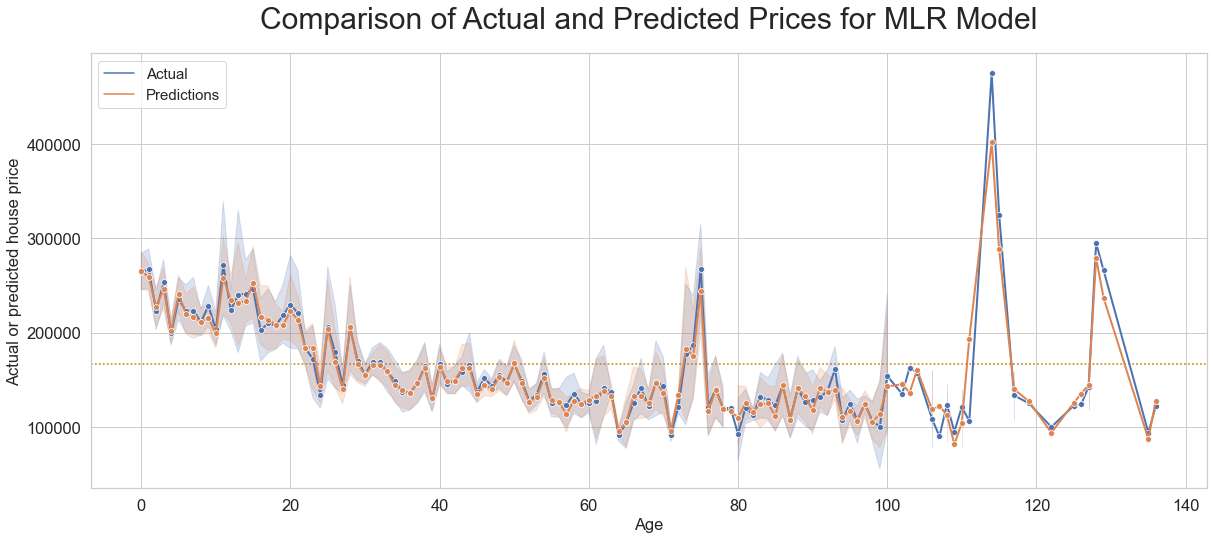

In [237]:
sns.lineplot(x='Age', y='value', data=pd.melt(lr_age_pred, ['Age'], var_name='status'), hue='status', linewidth=2, marker='o', zorder=1000)

plt.axhline(np.exp(np.mean(lr.predict(X))), color='orange',linestyle=':',zorder=-1)
plt.axhline(np.exp(np.mean(y)), color='b',linestyle=':', zorder=-2) 

plt.ylabel('Actual or predicted house price')
plt.xlabel('Age')
plt.title('Comparison of Actual and Predicted Prices for MLR Model')

leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(2)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(size*1.1)
plt.legend(loc='upper left')

In [240]:
 lr2_age_pred= pd.DataFrame({'Age': X['Age'], 'Actual': np.exp(y), 'Predictions': np.exp(lr2.predict(X[imp_cols]))})

In [1]:
sns.lineplot(x='Age', y='value', data=pd.melt(lr2_age_pred, ['Age'], var_name='status'), hue='status', linewidth=2, marker='o', zorder=1000)

plt.axhline(np.exp(np.mean(lr2.predict(X[imp_cols]))), color='orange',linestyle=':',zorder=-1)
plt.axhline(np.exp(np.mean(y)), color='b',linestyle=':', zorder=-2) 

plt.ylabel('Actual or predicted house price')
plt.xlabel('Age')
plt.title('Comparison of Actual and Predicted Prices for MLR Lasso Model')

leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(2)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(size*1.1)
plt.legend(loc='upper left')

NameError: name 'sns' is not defined

In [81]:
 xgb_age_pred= pd.DataFrame({'Age': Xu['Age'], 'Actual': np.exp(yu), 'Predictions': np.exp(xgb.predict(Xu))})

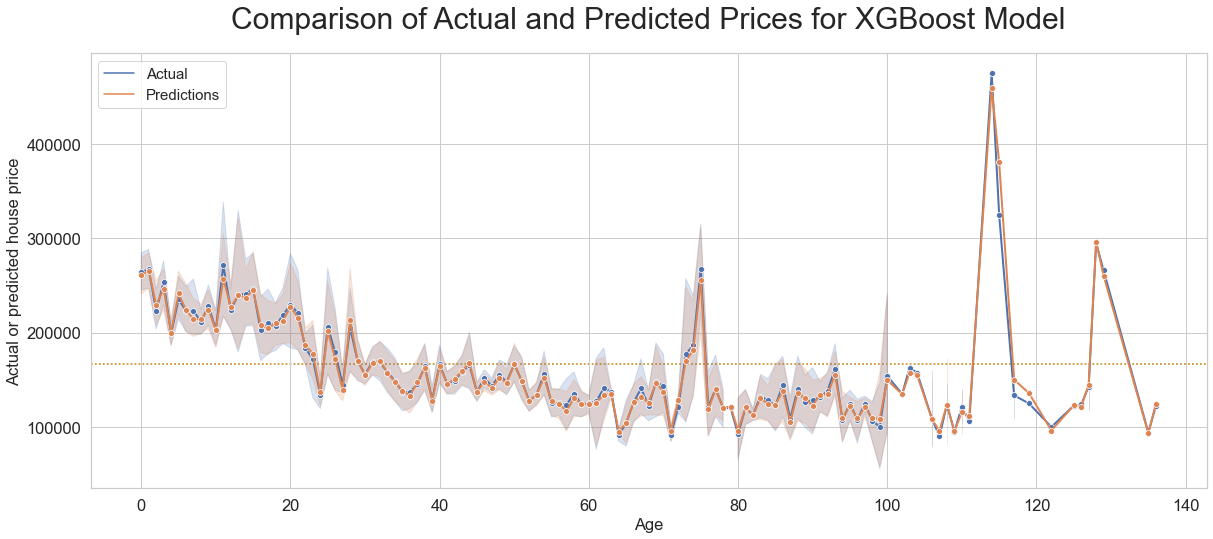

In [83]:
sns.lineplot(x='Age', y='value', data=pd.melt(xgb_age_pred, ['Age'], var_name='status'), hue='status', linewidth=2, marker='o', zorder=1000)

plt.axhline(np.exp(np.mean(xgb.predict(Xu))), color='orange',linestyle=':',zorder=-1)
plt.axhline(np.exp(np.mean(y)), color='b',linestyle=':', zorder=-2) 

plt.ylabel('Actual or predicted house price')
plt.xlabel('Age')
plt.title('Comparison of Actual and Predicted Prices for XGBoost Model')

leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(2)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(size*1.1)
plt.legend(loc='upper left')

In [24]:
gbm_age_pred= pd.DataFrame({'Age': Xu['Age'], 'Actual': np.exp(yu), 'Predictions': np.exp(gbm.predict(Xu))})

Text(0.5, 1.0, 'Comparison of Actual and Predicted Prices for Gradient Boost Model')

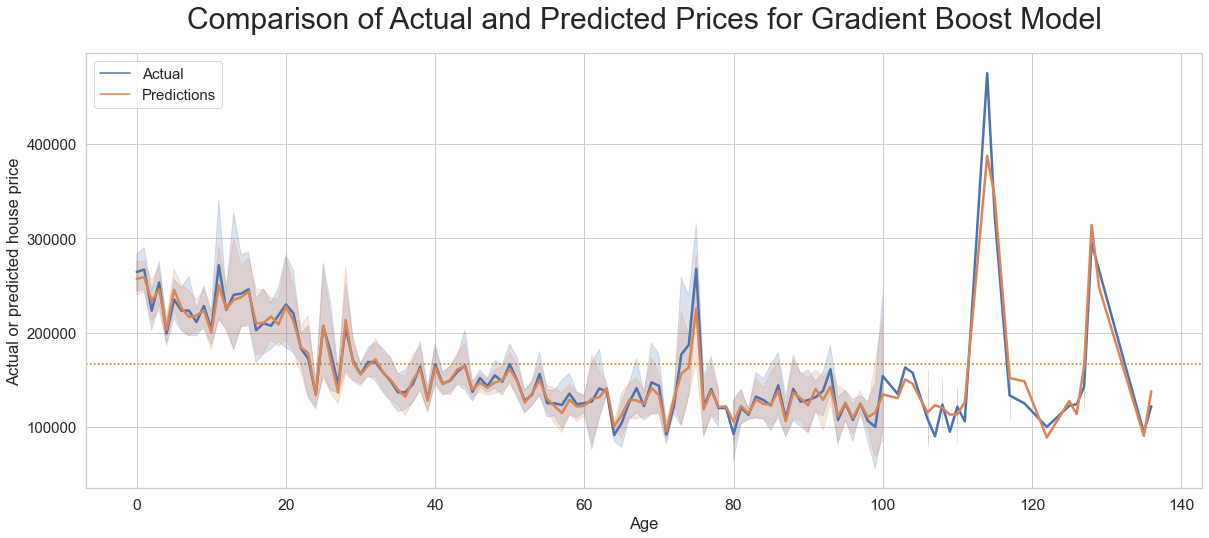

In [30]:
sns.lineplot(x='Age', y='value', data=pd.melt(gbm_age_pred, ['Age'], var_name='status'), hue='status', linewidth=2.5, zorder=1000)

plt.axhline(np.exp(np.mean(gbm.predict(X))), color='orange',linestyle=':',zorder=-1)
plt.axhline(np.exp(np.mean(y)), color='b',linestyle=':', zorder=-2) 

plt.legend(loc='upper left')
plt.ylabel('Actual or predicted house price')
plt.xlabel('Age')
plt.title('Comparison of Actual and Predicted Prices for Gradient Boost Model')

In [75]:
rf_age_pred= pd.DataFrame({'Age': Xu['Age'], 'Actual': np.exp(yu), 'Predictions': np.exp(rf.predict(Xu))})

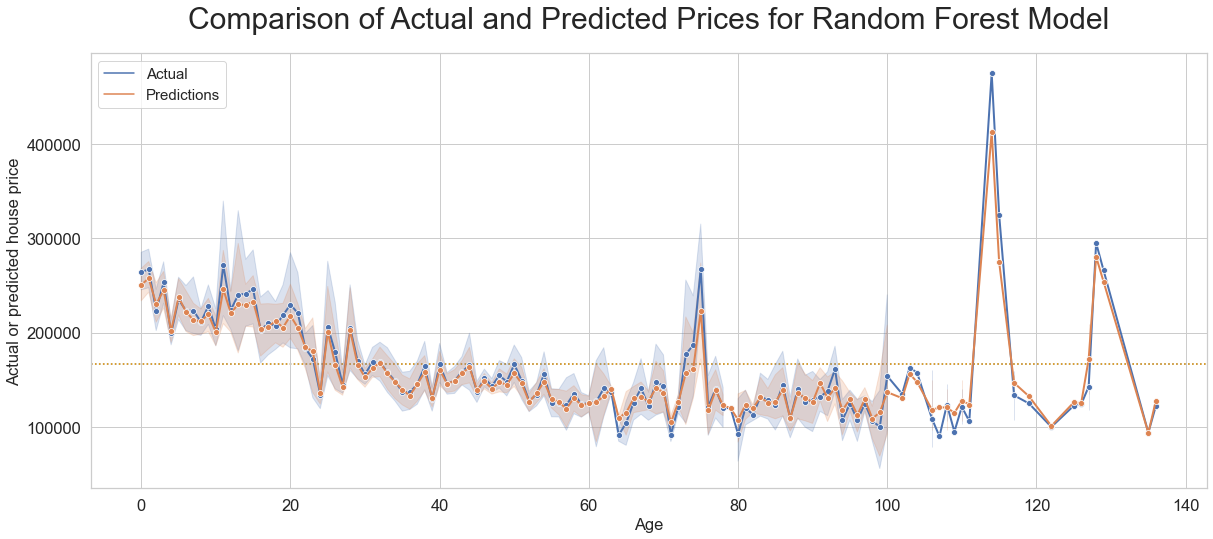

In [79]:
sns.lineplot(x='Age', y='value', data=pd.melt(rf_age_pred, ['Age'], var_name='status'), hue='status', linewidth=2, marker='o', zorder=1000)

plt.axhline(np.exp(np.mean(rf.predict(Xu))), color='orange',linestyle=':',zorder=-1)
plt.axhline(np.exp(np.mean(y)), color='b',linestyle=':', zorder=-2) 

plt.ylabel('Actual or predicted house price')
plt.xlabel('Age')
plt.title('Comparison of Actual and Predicted Prices for Random Forest Model')

leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(2)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(size*1.1)
plt.legend(loc='upper left')

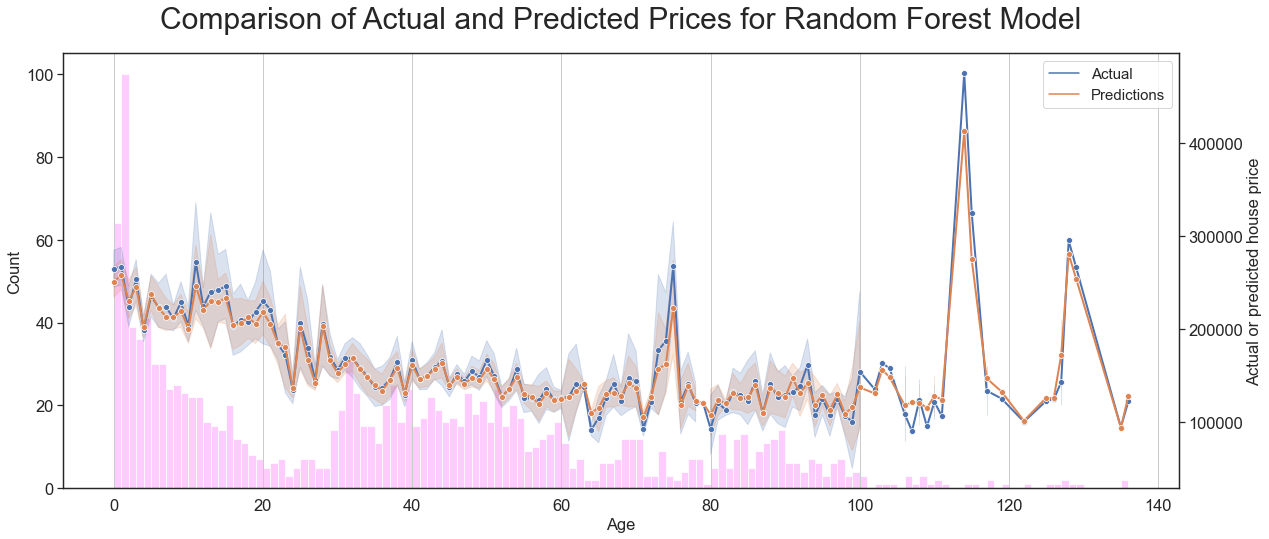

In [322]:
## add histogram in background

sns.set_style("white")

fig, ax = plt.subplots()
sns.histplot(Xu['Age'],bins=136, color='magenta', alpha=0.2, fill=True, zorder=-1000)
ax.set_ylabel('Count')
ax.xaxis.grid(True)

ax2 = ax.twinx()
sns.lineplot(x='Age', y='value', data=pd.melt(rf_age_pred, ['Age'], var_name='status'), hue='status', linewidth=2, marker='o', zorder=1000)
ax2.set_ylabel('Actual or predicted house price')
ax2.set_xlabel('Age in years')
ax2.set_title('Comparison of Actual and Predicted Prices for Random Forest Model')
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(2)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(size*1.1)
ax2.legend(loc='upper right')

plt.show()

## Test models with dataset of houses <=60 years

In [112]:
train_undum_df60 = train_undum_df[train_undum_df['Age']<=60]

In [113]:
#assign predictor and target variables
y60 = train_undum_df60['SalePrice'].apply(np.log)
X60 = train_undum_df60.drop(["SalePrice"], axis = 1)

In [114]:
#train/test split 
Xu_train60, Xu_test60, yu_train60, yu_test60 = train_test_split(X60, y60, test_size = 0.3, random_state = 0)

In [115]:
# best parameters with lowered max_depth
rf60 = RandomForestRegressor()
#     bootstrap= False,
#                     ccp_alpha= 0.0,
#                     criterion= 'mse',
#                     max_depth= 6,
#                     max_features= 8,
#                     max_leaf_nodes= None,
#                     max_samples= None,
#                     min_samples_leaf= 1,
#                     min_samples_split= 2,
#                     n_estimators= 500,
#                     random_state= 42)

rf60.fit(Xu_train60, yu_train60)

RandomForestRegressor()

In [116]:
train_baseline_rf = rf60.predict(Xu_train60)
RMSE_train4 = np.sqrt(mean_squared_error(yu_train60, train_baseline_rf))
MAE_train4 = mean_absolute_error(yu_train60, train_baseline_rf)


test_baseline_rf = rf60.predict(Xu_test60)
RMSE_test4 = np.sqrt(mean_squared_error(yu_test60,test_baseline_rf))
MAE_test4 = mean_absolute_error(yu_test60,test_baseline_rf)

print("R^2 for train data is: %.3f" %(rf60.score(Xu_train60, yu_train60)))
print("R^2 for test data is: %.3f" %(rf60.score(Xu_test60, yu_test60)))
print("-" * 50)
print("RMSE for train data is: %.3f" % RMSE_train4)
print("RMSE for test data is: %.3f" % RMSE_test4)
print("-" * 50)
print("RAE for train data is: %.4f" % MAE_train4)
print("RAE for test data is: %.4f" % MAE_test4)

R^2 for train data is: 0.983
R^2 for test data is: 0.830
--------------------------------------------------
RMSE for train data is: 0.050
RMSE for test data is: 0.140
--------------------------------------------------
RMSE for train data is: 0.0332
RMSE for test data is: 0.0892


In [42]:
#manually lowered max depth 
gbm60 = GradientBoostingRegressor(n_estimators=1000,
                                 learning_rate=0.01,
                                 max_depth=2,
                                 max_features=15)

gbm60.fit(Xu_train60, yu_train60)

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, max_features=15,
                          n_estimators=1000)

In [49]:
train_baseline_gbm = gbm60.predict(Xu_train60)
RMSE_train5 = np.sqrt(mean_squared_error(yu_train60, train_baseline_gbm))
MAE_train5 = mean_absolute_error(yu_train60, train_baseline_gbm)


test_baseline_gbm = gbm60.predict(Xu_test60)
RMSE_test5 = np.sqrt(mean_squared_error(yu_test60,test_baseline_gbm))
MAE_test5 = mean_absolute_error(yu_test60,test_baseline_gbm)


print("Final Values: ")
print("R^2 for train data is: %.3f" %(gbm60.score(Xu_train60, yu_train60)))
print("R^2 for test data is: %.3f" %(gbm60.score(Xu_test60,yu_test60)))
print("-" * 50)
print("RMSE for train data is: %.3f" % RMSE_train5)
print("RMSE for test data is: %.3f" % RMSE_test5)
print("-" * 50)
print("MAE for train data is: %.4f" % MAE_train5)
print("MAE for test data is: %.4f" % MAE_test5)

Final Values: 
R^2 for train data is: 0.939
R^2 for test data is: 0.843
--------------------------------------------------
RMSE for train data is: 0.094
RMSE for test data is: 0.134
--------------------------------------------------
MAE for train data is: 0.0693
MAE for test data is: 0.0875


In [56]:
#manually lowered max depth 
xgb60= XGBRegressor(
    colsample_bytree= 0.8,
                        gamma= 0,
                        learning_rate=0.01,
                        max_depth= 6,
                        min_child_weight= 1,
                        n_estimators= 1000,
                        random_state=1,
                        reg_alpha= 0,
                        subsample= 0.8)
xgb60.fit(Xu_train60, yu_train60)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
train_baseline_xgb = xgb60.predict(Xu_train60)
RMSE_train6 = np.sqrt(mean_squared_error(yu_train60, train_baseline_xgb))
MAE_train6 = mean_absolute_error(yu_train60, train_baseline_xgb)


test_baseline_xgb = xgb60.predict(Xu_test60)
RMSE_test6 = np.sqrt(mean_squared_error(yu_test60,test_baseline_xgb))
MAE_test6 = mean_absolute_error(yu_test60,test_baseline_xgb)


print("Final Values: ")
print("R^2 for train data is: %.3f" %(xgb60.score(Xu_train60, yu_train60)))
print("R^2 for test data is: %.3f" %(xgb60.score(Xu_test60,yu_test60)))
print("-" * 50)
print("RMSE for train data is: %.3f" % RMSE_train6)
print("RMSE for test data is: %.3f" % RMSE_test6)
print("-" * 50)
print("MAE for train data is: %.4f" % MAE_train6)
print("MAE for test data is: %.4f" % MAE_test6)


Final Values: 
R^2 for train data is: 0.990
R^2 for test data is: 0.875
--------------------------------------------------
RMSE for train data is: 0.038
RMSE for test data is: 0.120
--------------------------------------------------
MAE for train data is: 0.0287
MAE for test data is: 0.0829


In [53]:
train_undum_df60p = train_undum_df[train_undum_df['Age']>60]

In [54]:
#assign predictor and target variables
y60p = train_undum_df60p['SalePrice'].apply(np.log)
X60p = train_undum_df60p.drop(["SalePrice"], axis = 1)

In [55]:
#train/test split 
Xu_train60p, Xu_test60p, yu_train60p, yu_test60p = train_test_split(X60p, y60p, test_size = 0.3, random_state = 0)

In [63]:
#manually lowered max depth 
xgb60p= XGBRegressor(
    colsample_bytree= 0.8,
                        gamma= 0,
                        learning_rate=0.01,
                        max_depth= 6,
                        min_child_weight= 1,
                        n_estimators= 1000,
                        random_state=1,
                        reg_alpha= 0,
                        subsample= 0.8)
xgb60p.fit(Xu_train60p, yu_train60p)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
train_baseline_xgb = xgb60p.predict(Xu_train60p)
RMSE_train6 = np.sqrt(mean_squared_error(yu_train60p, train_baseline_xgb))
MAE_train6 = mean_absolute_error(yu_train60p, train_baseline_xgb)


test_baseline_xgb = xgb60p.predict(Xu_test60p)
RMSE_test6 = np.sqrt(mean_squared_error(yu_test60p,test_baseline_xgb))
MAE_test6 = mean_absolute_error(yu_test60p,test_baseline_xgb)


print("Final Values: ")
print("R^2 for train data is: %.3f" %(xgb60p.score(Xu_train60p, yu_train60p)))
print("R^2 for test data is: %.3f" %(xgb60p.score(Xu_test60p,yu_test60p)))
print("-" * 50)
print("RMSE for train data is: %.3f" % RMSE_train6)
print("RMSE for test data is: %.3f" % RMSE_test6)
print("-" * 50)
print("MAE for train data is: %.4f" % MAE_train6)
print("MAE for test data is: %.4f" % MAE_test6)


Final Values: 
R^2 for train data is: 0.998
R^2 for test data is: 0.751
--------------------------------------------------
RMSE for train data is: 0.017
RMSE for test data is: 0.187
--------------------------------------------------
MAE for train data is: 0.0121
MAE for test data is: 0.1437


## EDA figures for presentation

In [4]:
train = pd.read_csv('/Users/RK/Google Drive/NYC_DSA/Project3_ML/Kaggle_DS/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/Users/RK/Google Drive/NYC_DSA/Project3_ML/Kaggle_DS/house-prices-advanced-regression-techniques/test.csv')

In [5]:
pd.DataFrame(train.corr(method='spearman')).style.background_gradient(cmap ='coolwarm')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.019226,-0.033335,-0.005364,-0.028771,0.003622,-0.005130,-0.011680,-0.035507,-0.013038,-0.006736,-0.009509,-0.033187,-0.000616,0.009455,-0.028463,0.002812,0.004662,-0.021475,0.007269,0.002564,0.041650,0.007574,0.025888,-0.013644,-0.000194,0.013301,0.006505,-0.043239,-0.003225,-0.006758,-0.036706,0.005962,0.055555,-0.043383,0.019018,0.001526,-0.018546
MSSubClass,0.019226,1.000000,-0.314265,-0.269570,0.108065,-0.071770,0.035848,0.006802,0.025035,-0.107629,-0.083871,-0.117603,-0.318897,-0.278318,0.487749,0.075794,0.203576,-0.042017,0.002480,0.194912,0.282632,0.068763,0.277162,0.165825,0.019480,0.079268,0.024226,-0.047133,0.023370,0.031900,0.011023,-0.035830,-0.021673,0.033250,-0.032840,0.018403,-0.027401,0.007192
LotFrontage,-0.033335,-0.314265,1.000000,0.649633,0.254952,-0.083242,0.194510,0.116772,0.258906,0.154014,0.052516,0.119436,0.386206,0.427678,0.055111,-0.030230,0.375844,0.085990,-0.003854,0.220234,0.096777,0.327679,0.002231,0.365999,0.245315,0.115694,0.351756,0.378052,0.109288,0.178073,-0.095811,0.063960,0.043849,0.084534,0.024198,0.025758,0.003461,0.409076
LotArea,-0.005364,-0.269570,0.649633,1.000000,0.233303,-0.046912,0.103385,0.075158,0.177539,0.171995,0.072019,0.077830,0.366197,0.443858,0.119356,-0.020255,0.449040,0.095609,0.045970,0.235377,0.142658,0.337788,-0.022752,0.405924,0.350198,0.041796,0.340195,0.367153,0.184285,0.176965,-0.066563,0.062282,0.092316,0.084460,0.059297,0.006423,-0.027473,0.456461
OverallQual,-0.028771,0.108065,0.254952,0.233303,1.000000,-0.177521,0.647392,0.557723,0.413500,0.132957,-0.117560,0.272939,0.459915,0.408730,0.289561,-0.034029,0.603262,0.098034,-0.050598,0.576372,0.298455,0.121517,-0.192439,0.427806,0.420626,0.618193,0.608756,0.541552,0.259439,0.435046,-0.162434,0.032903,0.046335,0.056667,-0.088019,0.061455,-0.025464,0.809829
OverallCond,0.003622,-0.071770,-0.083242,-0.046912,-0.177521,1.000000,-0.416964,-0.041464,-0.179187,-0.011087,0.102471,-0.128270,-0.217375,-0.166686,0.001111,0.039556,-0.153720,-0.052676,0.116015,-0.262400,-0.071342,-0.003713,-0.099754,-0.104919,-0.045383,-0.379398,-0.254763,-0.200718,-0.042662,-0.133284,0.109749,0.032384,0.074728,-0.005605,0.086625,-0.007203,0.050214,-0.129325
YearBuilt,-0.005130,0.035848,0.194510,0.103385,0.647392,-0.416964,1.000000,0.684388,0.402349,0.189645,-0.111692,0.139014,0.427187,0.293363,0.029716,-0.145936,0.288493,0.162080,-0.066313,0.537420,0.244901,-0.035257,-0.155604,0.176820,0.174655,0.890546,0.601519,0.528281,0.287729,0.392691,-0.408622,0.022498,-0.073119,0.008986,-0.091786,0.018621,-0.014100,0.652682
YearRemodAdd,-0.011680,0.006802,0.116772,0.075158,0.557723,-0.041464,0.684388,1.000000,0.234333,0.063353,-0.126086,0.176921,0.299042,0.240265,0.073049,-0.064542,0.282400,0.099904,-0.031495,0.431390,0.151562,-0.054371,-0.154208,0.198243,0.119270,0.722377,0.456245,0.398267,0.230241,0.353325,-0.235037,0.051694,-0.045808,0.002821,-0.090868,0.021081,0.045158,0.571159
MasVnrArea,-0.035507,0.025035,0.258906,0.177539,0.413500,-0.179187,0.402349,0.234333,1.000000,0.241565,-0.061342,0.075561,0.360104,0.352351,0.063162,-0.106994,0.322678,0.121004,0.032870,0.290366,0.168776,0.113137,-0.049387,0.263912,0.255627,0.305964,0.401606,0.364755,0.173736,0.208681,-0.179589,0.040997,0.038171,0.004863,-0.050279,0.017732,0.000552,0.421309
BsmtFinSF1,-0.013038,-0.107629,0.154014,0.171995,0.132957,-0.011087,0.189645,0.063353,0.241565,1.000000,0.050398,-0.573638,0.410413,0.323478,-0.191236,-0.079054,0.057471,0.674175,0.090712,0.011986,-0.013907,-0.084164,-0.106369,-0.050062,0.192264,0.078935,0.181381,0.244161,0.179359,0.081420,-0.148339,0.046802,0.

In [6]:
# matplotlib params
size=17
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,11),
          'axes.titlesize': size*2,
          'axes.labelsize': size*1.1,
          'xtick.labelsize': size*1.1,
          'ytick.labelsize': size*1.1,
          'axes.titlepad': 25,
          'figure.titlesize': size*2,
          'legend.fontsize': size,
            'legend.title_fontsize': size}

plt.rcParams.update(params)
sns.set_style("whitegrid")

<Figure size 1440x792 with 0 Axes>

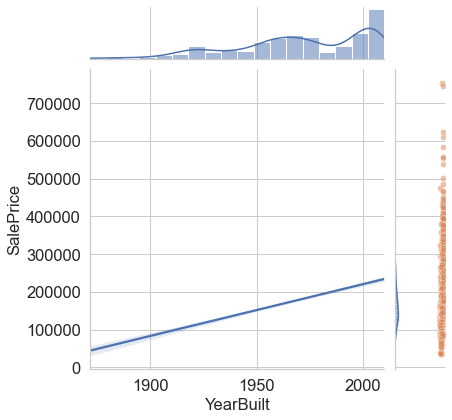

In [11]:

plt.figure()
sns.jointplot(x='YearBuilt',y='SalePrice', data=train, kind='reg', scatter=False)
sns.scatterplot(x='YearBuilt',y='SalePrice',data=train, alpha=0.5)
plt.savefig("PriceVsYearBuilt.png")

In [7]:
cols= ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt' ,'LotArea','MoSold', 'YrSold']
train[cols]

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,LotArea,MoSold,YrSold
0,208500,7,1710,2,2003,8450,2,2008
1,181500,6,1262,2,1976,9600,5,2007
2,223500,7,1786,2,2001,11250,9,2008
3,140000,7,1717,3,1915,9550,2,2006
4,250000,8,2198,3,2000,14260,12,2008
...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,1999,7917,8,2007
1456,210000,6,2073,2,1978,13175,2,2010
1457,266500,7,2340,1,1941,9042,5,2010
1458,142125,5,1078,1,1950,9717,4,2010


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'SalePrice'),
  Text(0, 1.5, 'OverallQual'),
  Text(0, 2.5, 'GrLivArea'),
  Text(0, 3.5, 'GarageCars'),
  Text(0, 4.5, 'YearBuilt'),
  Text(0, 5.5, 'LotArea'),
  Text(0, 6.5, 'MoSold'),
  Text(0, 7.5, 'YrSold')])

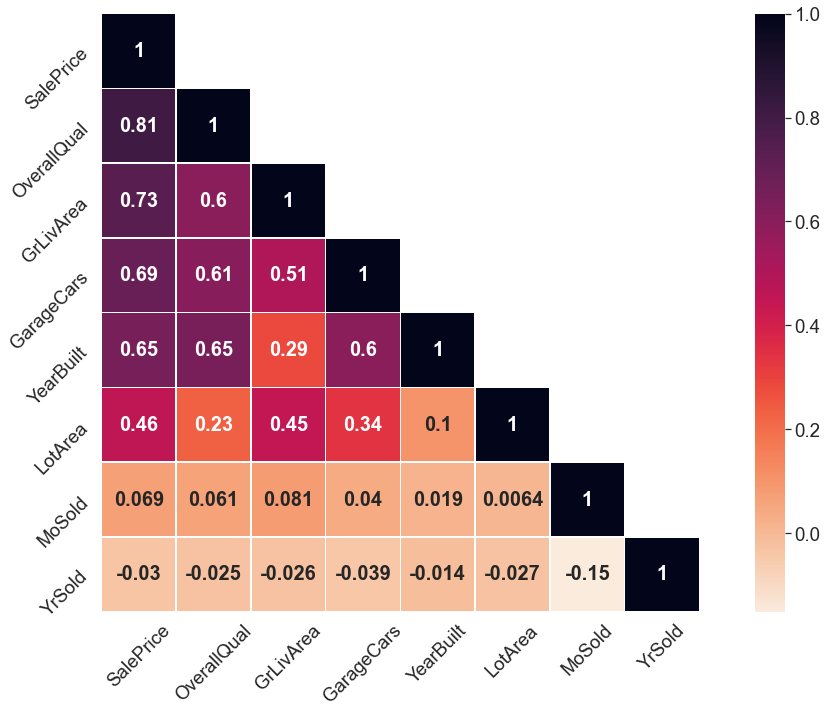

In [8]:
#sns.set(rc={'figure.figsize':(12,10)})
cor_df=train[cols].corr(method='spearman')
mask_ut=np.triu(np.ones(cor_df.shape), k=1).astype(np.bool)
mask_ut
plt.figure()
sns.heatmap(cor_df, annot=True, mask=mask_ut, cmap="rocket_r",linewidths=.5, 
            square=True, xticklabels=True, yticklabels=True, annot_kws={"size":20,"weight": "bold"})
plt.xticks(rotation=45)
plt.yticks(rotation=45)
#plt.show()
#plt.savefig("EDA_correlation.png")